31.05.2022

# Referat: Einführung in spaCy

Sommersemester 2023

Kurs: DH1 - Sprache & Text

Dozent: Andreas Blombach

Gehalten von: Christian Hagenest

# Inhalt

- Was ist spaCy?
- Installation
- Features
    - Tokenization
    - Linguistische Annotationen
    - Named Entity Recognition
    - Wortvektoren & Ähnlichkeit
    - Sentimentanalyse

- Vergleich mit anderen Libraries


# Was ist spaCy?

- Python Library für NLP (Natural Language Processing)
- Fokus auf einfach Benutzbarkeit und gute Performance
- Opiniertes Design
    - d.h. SpaCy lässt dem User wenig Freiheiten bei der Wahl von Algorithmen, sondern wählt selbst die "besten" Algorithmen aus
    - Zielgruppe: Mehr Industrie als Forschung
- Open Source (MIT Lizenz)


# Installation

### Mit Pip (empfohlen)
Hier mit den kleinen, schnellen Pipelines (Je ca. 50 MB)


```bash
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download de_core_news_lg
```

### Mit Conda
Hier mit den größeren, genaueren Pipelines (Je ca. 500 MB)

```bash
conda install -c conda-forge spacy
python -m spacy download de_core_news_lg
```
*'-c conda-forge'* solltet ihr nicht benötigen, wenn ihr statt Anaconda bereits CondaForge oder MiniForge verwendet.

### Am Besten: Interaktive Anleitung auf spacy.io
[Install spaCy](https://spacy.io/usage)

![resources/install.png](resources/install.png)

Wenn ihr das Notebook selbst ausführen möchtet, braucht ihr auch die folgenden Libraries:

```
pandas plotly numpy spacyfishing spacytextblob textblob-de wordcloud
```

Falls ihr **poetry** für euer Dependency-Management verwendet, könnt ihr einfach in diesem Verzeichnis ```poetry install``` ausführen und dann mit ```poetry run jupyter notebook``` das Notebook starten.

In [79]:
# Datenquelle

import pandas as pd

df = pd.read_json("data/taz.json")
example = df['description'][3]
print("Beispiel-Text: \n\n", example, "\n\n")

# Erste Schritte mit spaCy

import spacy

nlp = spacy.load('de_core_news_lg')

Beispiel-Text: 

 Die Polizei auf den Bahamas hat den Gründer und Ex-Geschäftsführer der Kryptoplattform FTX verhaftet. Die US-Regierung veranlasste die Festnahme. 




# Features

## Tokenization

- Spacy kann Wörter und Satzzeichen erkennen und in Token umwandeln
- Erkennt z.B. auch, dass "z.B." ein Token ist

In [80]:
doc = nlp(example)
print("Tokenization: \n\n", [token.text for token in doc], "\n\n")

Tokenization: 

 ['Die', 'Polizei', 'auf', 'den', 'Bahamas', 'hat', 'den', 'Gründer', 'und', 'Ex-Geschäftsführer', 'der', 'Kryptoplattform', 'FTX', 'verhaftet', '.', 'Die', 'US-Regierung', 'veranlasste', 'die', 'Festnahme', '.'] 




## Linguistische Annotationen

- Spacy kann eine Vielzahl von linguistischen Annotationen automatisch vornehmen
    - z.B. Lemma - Grundform des Wortes
    - POS - Part of Speech (Wortart)
    - Tag - Feinere Unterscheidung der Wortart
    - Dep - Abhängigkeiten zwischen Wörtern
    - Shape - Die Form eines Wortes, z.B. Groß-/Kleinschreibung, Zeichensetzung, Länge
    - isAlpha - Ist das Token ein Wort?
    - isStop - Ist das Token ein Stoppwort? (z.B. "der", "die", "das")    
- Hierfür benötigt Spacy ein vortrainiertes Modell


In [81]:
annotated = [[token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop] for token in doc]

annotated = pd.DataFrame(annotated, columns=["Text", "Lemma", "POS", "Tag", "Dep", "Shape", "IsAlpha", "IsStop"])
annotated

,Text,Lemma,POS,Tag,Dep,Shape,IsAlpha,IsStop
0,Die,der,DET,ART,nk,Xxx,True,True
1,Polizei,Polizei,NOUN,NN,sb,Xxxxx,True,False
2,auf,auf,ADP,APPR,mnr,xxx,True,True
3,den,der,DET,ART,nk,xxx,True,True
4,Bahamas,Bahamas,PROPN,NE,nk,Xxxxx,True,False
5,hat,haben,AUX,VAFIN,ROOT,xxx,True,True
6,den,der,DET,ART,nk,xxx,True,True
7,Gründer,Gründer,NOUN,NN,oa,Xxxxx,True,False
8,und,und,CCONJ,KON,cd,xxx,True,True
9,Ex-Geschäftsführer,Ex-Geschäftsführer,NOUN,NN,cj,Xx-Xxxxx,False,False


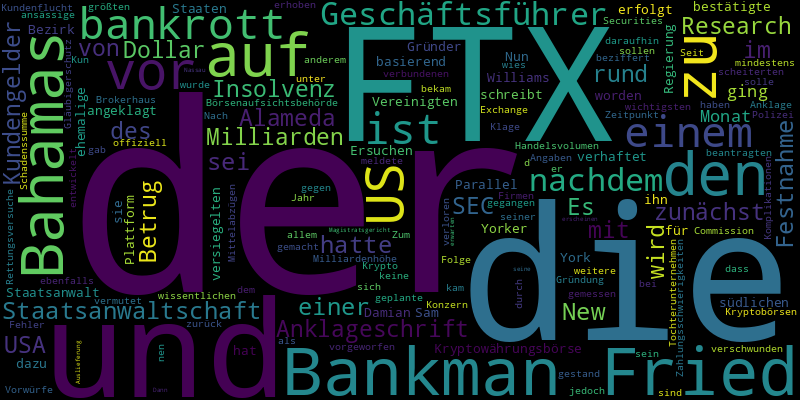

In [82]:
# Die Annotationen sind z.B. zur Erstellung von Wortwolken nützlich
from wordcloud import WordCloud

example_long = df['text'][3]
doc_long = nlp(example_long)

# Eine Wordcloud aus dem unveränderten Text
wordcloud = WordCloud(width=800, height=400).generate(example_long)
wordcloud.to_image()

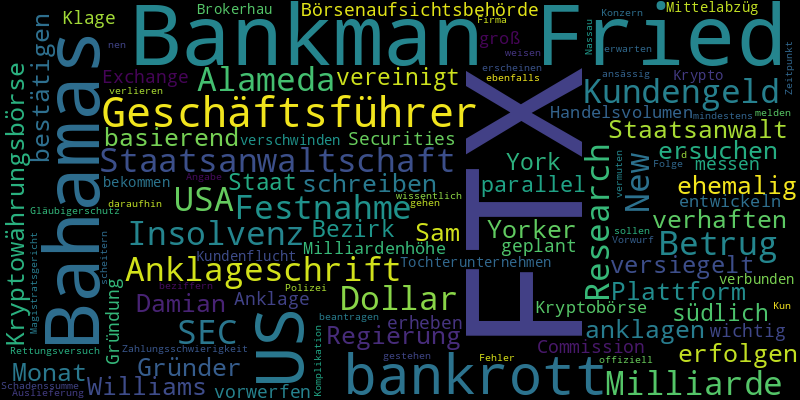

In [83]:
tokes = [token.lemma_ for token in doc_long if not token.is_stop]
wordcloud = WordCloud(width=800, height=400).generate(" ".join(tokes))
wordcloud.to_image()

In [84]:
# SpaCy kann das Verhältnis zwischen Wörtern in einem Satz visuell darstellen
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)

In [129]:
spacy.explain("")

'accusative object'

## Named Entity Recognition

SpaCy kann Named Entities erkennen, klassifizieren und visualisieren.
Gerade auf deutsch kommt spaCy hierbei manchmal an seine Grenzen, selbst wenn man wie hier das große Modell benutzt:

In [130]:
displacy.render(doc_long, style="ent", jupyter=True)

### Linken von Named Entities zu Wikidata mit spacyfishing

#### Bugged: Ich bekomme die Pipeline nicht zu laufen. Ich versuche am Dienstag noch zu debuggen, ansonsten stelle ich eine andere Pipeline vor.

Die spaCy-Pipeline spacyfishing kann Named Entities mit automatisch mit Wikidata-Einträgen verlinken.
Leider funktioniert spacyfishing nur mit den englischen Modellen.

Achtung: Die meisten SpaCy-Pipelines sind nicht Teil von Anaconda oder CondaForge und müssen daher mit Pip installiert werden. Es ist möglich mit Conda ein virtuelles Environment anzulegen, dort Pip zu installieren und dann die Pipelines zu installieren. Das ist aber etwas komplizierter - einfacher ist es für alle Abhängigkeiten Pip zu verwenden.

In [131]:
#import spacyfishing
#nlp.add_pipe('entityfisher')
#with open("data/example_en.txt") as f:
#    doc_en = nlp(f.read())
#displacy.render(doc_en, style="ent", jupyter=True)

In [132]:
#fished = [[ent.text, ent.label_, ent._.url_wikidata, ent._.nerd_score] for ent in doc_en.ents]
#fished = pd.DataFrame(fished, columns=["Text", "Label", "Wikidata", "NerdScore"])
#fished

### Ähnlichkeit von Wörtern

- SpaCy kann Wörter als Vektoren darstellen, die die Bedeutung des Wortes repräsentieren. 
- Diese Vektoren können dann verglichen werden, um die Ähnlichkeit zwischen Wörtern zu bestimmen.

- Achtung: Die kleinen Modelle von SpaCy können liefern keine Vektoren mit.

In [133]:
example_words = nlp("Haus Turm Katze arithmetisch yfhrd")

vectors = [[token.text, token.has_vector, token.vector_norm, token.is_oov] for token in example_words]

vectors = pd.DataFrame(vectors)
vectors.columns = ["Text", "HasVector", "VectorNorm", "IsOOV"]
vectors

,Text,HasVector,VectorNorm,IsOOV
0,Haus,True,56.222073,False
1,Turm,True,49.403755,False
2,Katze,True,43.214478,False
3,arithmetisch,False,0.000000,True
4,yfhrd,False,0.000000,True


In [134]:
import plotly.express as px
import numpy as np

similarity = []

for token1 in example_words:
    for token2 in example_words:
        similarity.append(token1.similarity(token2))

tokens = [token.text for token in example_words]
similarity = pd.DataFrame(np.array(similarity).reshape(tokens.__len__(), tokens.__len__()))
similarity.columns = tokens
similarity.index = tokens
# heatmap
fig = px.imshow(similarity)
fig.show()


/tmp/ipykernel_31087/440262561.py:8: UserWarning:

[W008] Evaluating Token.similarity based on empty vectors.



- Achtung: Die Ähnlichkeit von Wörten ist sehr ungenau:
    - Ähnlichkeit ist subjektiv
    - Die Reihenfolge der Wörter hat keine Auswirkungen auf das Ergebnis
    - Bsp: Sind die Sätze "Ich mag Züge" und "Ich mag Züge nicht" ähnlich?

In [135]:
sentence1 = nlp("Ich mag Züge")
sentence2 = nlp("Ich mag Züge nicht")

print("Ähnlichkeit: ", sentence1.similarity(sentence2))

Ähnlichkeit:  0.9622064306893177


### Sentimentanalyse mit spacytextblob

- Mit spacytextblob (und textblobde) kann spaCy Sentimentanalysen durchführen
- Polarity: Wie positiv oder negativ ist der Text?
- Subjectivity: Wie subjektiv ist der Text?

In [136]:
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob_de import TextBlobDE

@spacy.registry.misc("spacytextblob.de_blob")
def create_de_blob():
    return TextBlobDE

nlp.add_pipe("spacytextblob", config={
    "blob_only": True,
    "custom_blob": {"@misc": "spacytextblob.de_blob"}
})

ValueError: [E007] 'spacytextblob' already exists in pipeline. Existing names: ['tok2vec', 'tagger', 'morphologizer', 'parser', 'lemmatizer', 'senter', 'attribute_ruler', 'ner', 'spacytextblob']

In [ ]:
sentiment_texts = [
    "Ich mag das Bild.",
    "Das Bild ist hässlich.",
    "Das Bild ist expressionistisch.",
    "Mir gefällt die Wand besser als das Bild.",
]
sentiments = [[text,
            nlp(text)._.blob.sentiment.polarity,
            nlp(text)._.blob.sentiment.subjectivity,
            ] for text in sentiment_texts]

sentiments = pd.DataFrame(sentiments, columns=["Text", "Polarity", "Subjectivity"])
sentiments


,Text,Polarity,Subjectivity
0,Ich mag das Bild.,1.0,0.0
1,Das Bild ist hässlich.,-1.0,0.0
2,Das Bild ist expressionistisch.,0.0,0.0
3,Mir gefällt die Wand besser als das Bild.,0.0,0.0


In [ ]:
# Beispiel: Sentimentanalyse von Nachrichtenartikeln

df["Polarity"] = df["text"].apply(lambda x: nlp(x)._.blob.sentiment.polarity)
df["Subjectivity"] = df["text"].apply(lambda x: nlp(x)._.blob.sentiment.subjectivity)
df_short = df[["title", "text", "Polarity", "Subjectivity"]].sort_values(by="Polarity", ascending=False)
df_short

,title,text,Polarity,Subjectivity
2,Ex-Basketballer Rodman will zu Putin: Experte ...,Seit 189 Tagen . Alle diplomatischen Bemühung...,0.145333,0.050667
7,Im Wahlkreis von Robert Habeck: Mehr als Minde...,| Es ist keine alltägliche Unterrichtsstund...,0.126905,0.023810
0,Deutsche Meisterschaften im Eiskunstlauf: HipH...,"„Man muss das Leben tanzen“, lautet das Motto ...",0.126316,0.052632
4,Schwangerschaftsabbrüche in Ungarn: Ein Herzkl...,| Ein Herzklopfen soll Abtreibungen in Unga...,0.122321,0.000000
9,Wagner-Söldnertruppe in der Ukraine: Putins Ma...,\n \n Die Rivalität zwischen der...,0.118487,0.057143
5,Verfassungsschutz und Rechtsextremisten: Die B...,Es ist ein Schlag mit Vorlauf. Seit 2019 prüft...,-0.025000,0.083333
6,Verbot von Nakba-Demonstrationen: Palästinense...,"| An diesem Montag ist Tag der Nakba, Arabi...",-0.048889,0.044444
3,Gründer von Crypto-Broker FTX verhaftet: Count...,| Vor einem Monat ging die Kryptowährungsbö...,-0.058824,0.000000
1,Welle der Proteste in Israel: Träumen vom Ende...,| Geld versprach der bedrängte israelische ...,-0.067308,0.166667
8,Buch „Mädchenmeuterei“ von Kirsten Fuchs: In s...,Ist es okay zu lügen? Wenn man damit andere sc...,-0.242793,0.032432


In [ ]:
labels_spacy = ["Tokenization", 
"Part-of-speech tags (fine grained tags, Token.tag)",
"Part-of-speech tags (coarse grained tags, Token.pos)",
"Morphological analysis",
"Sentence segmentation (precision)",
"Unlabeled dependencies",
"Labeled dependencies",
"Lemmatization",
"Named entities (precision)"
]
spacy_de_small = [1, 0.97, 0.98, 0.91, 0.94, 0.92, 0.90, 0.97, 0.83]
spacy_de_large = [1, 0.98, 0.98, 0.92, 0.95, 0.93, 0.91, 0.98, 0.85]
spacy_de_trans = [1, 0.99, 0.99, 0.97, 0.98, 0.96, 0.95, 0.99, 0]
bench = [spacy_de_small, spacy_de_large, spacy_de_trans]
df_bench = pd.DataFrame(bench)
df_bench.columns = labels_spacy
df_bench.index = ["de_core_news_sm", "de_core_news_lg", "de_core_news_trf"]
df_bench = df_bench.transpose()


<Axes: title={'center': 'SpaCy Benchmark'}>

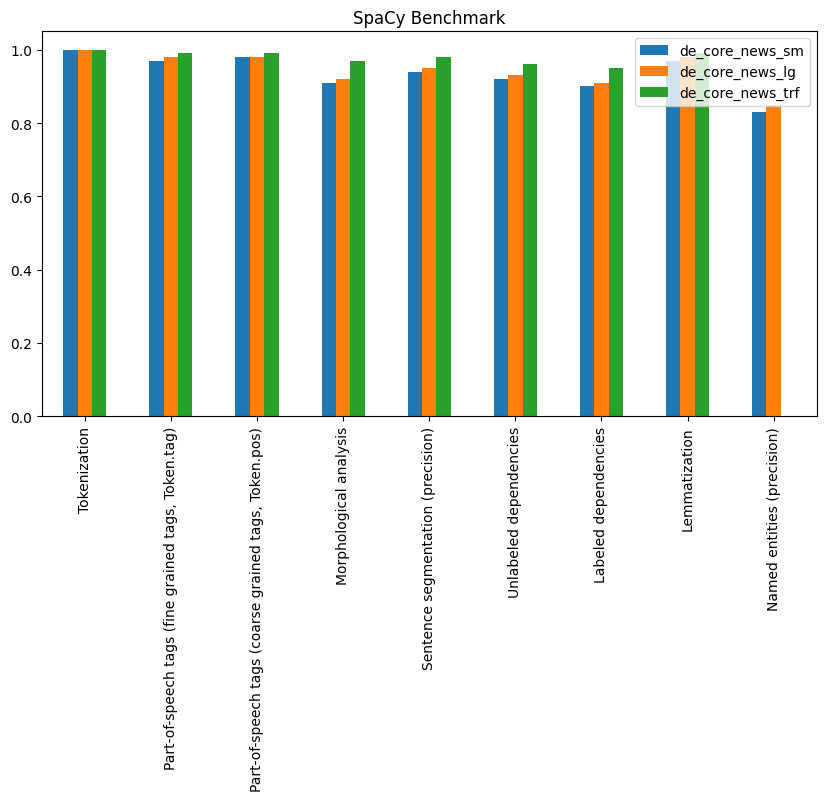

In [ ]:
df_bench.plot.bar(title="SpaCy Benchmark", figsize=(10, 5))

## SpaCy Transformer

- SpaCy Transformer ist ein neues Feature, das spaCy 3.0 eingeführt wurde
- Es ermöglicht die Verwendung von Modellen, die mit HuggingFace Transformers trainiert wurden
    - Z.B. das Modell "bert-base-german-cased" von deepset.ai
- Das deutsche Transformer-Modell ist in etwa so gut wie das große deutsche Modell von spaCy, aber deutlich präziser



In [ ]:
# Beispiel Named Entity Recognition

#import spacy_transformers # auch wenn es nicht explizit verwendet wird, wird es benötigt
# Wenn ihr hier eine Fehlermeldung mit 'NoneType' object has no attribute 'full' bekommt,
# kann es sein, dass spaCy denkt, dass ihr den Code auf der 

#nlp_trans = spacy.load("de_dep_news_trf")
#doc_long_trans = nlp_trans(example_long)

#displacy.render(doc_long_trans, style="ent", jupyter=True)

- Transformer-Modelle können auf der CPU ausgeführt werden, aber die Ausführung ist deutlich schneller auf einer GPU
- Ich habe sie auf meinem Laptop mit AMD APU nicht zum Laufen bekommen

## Benchmark: SpaCy vs andere NLP Libraries

SpaCy hat den Ruf, die schnellste NLP Library zu sein, aber dafür weniger genau zu sein.

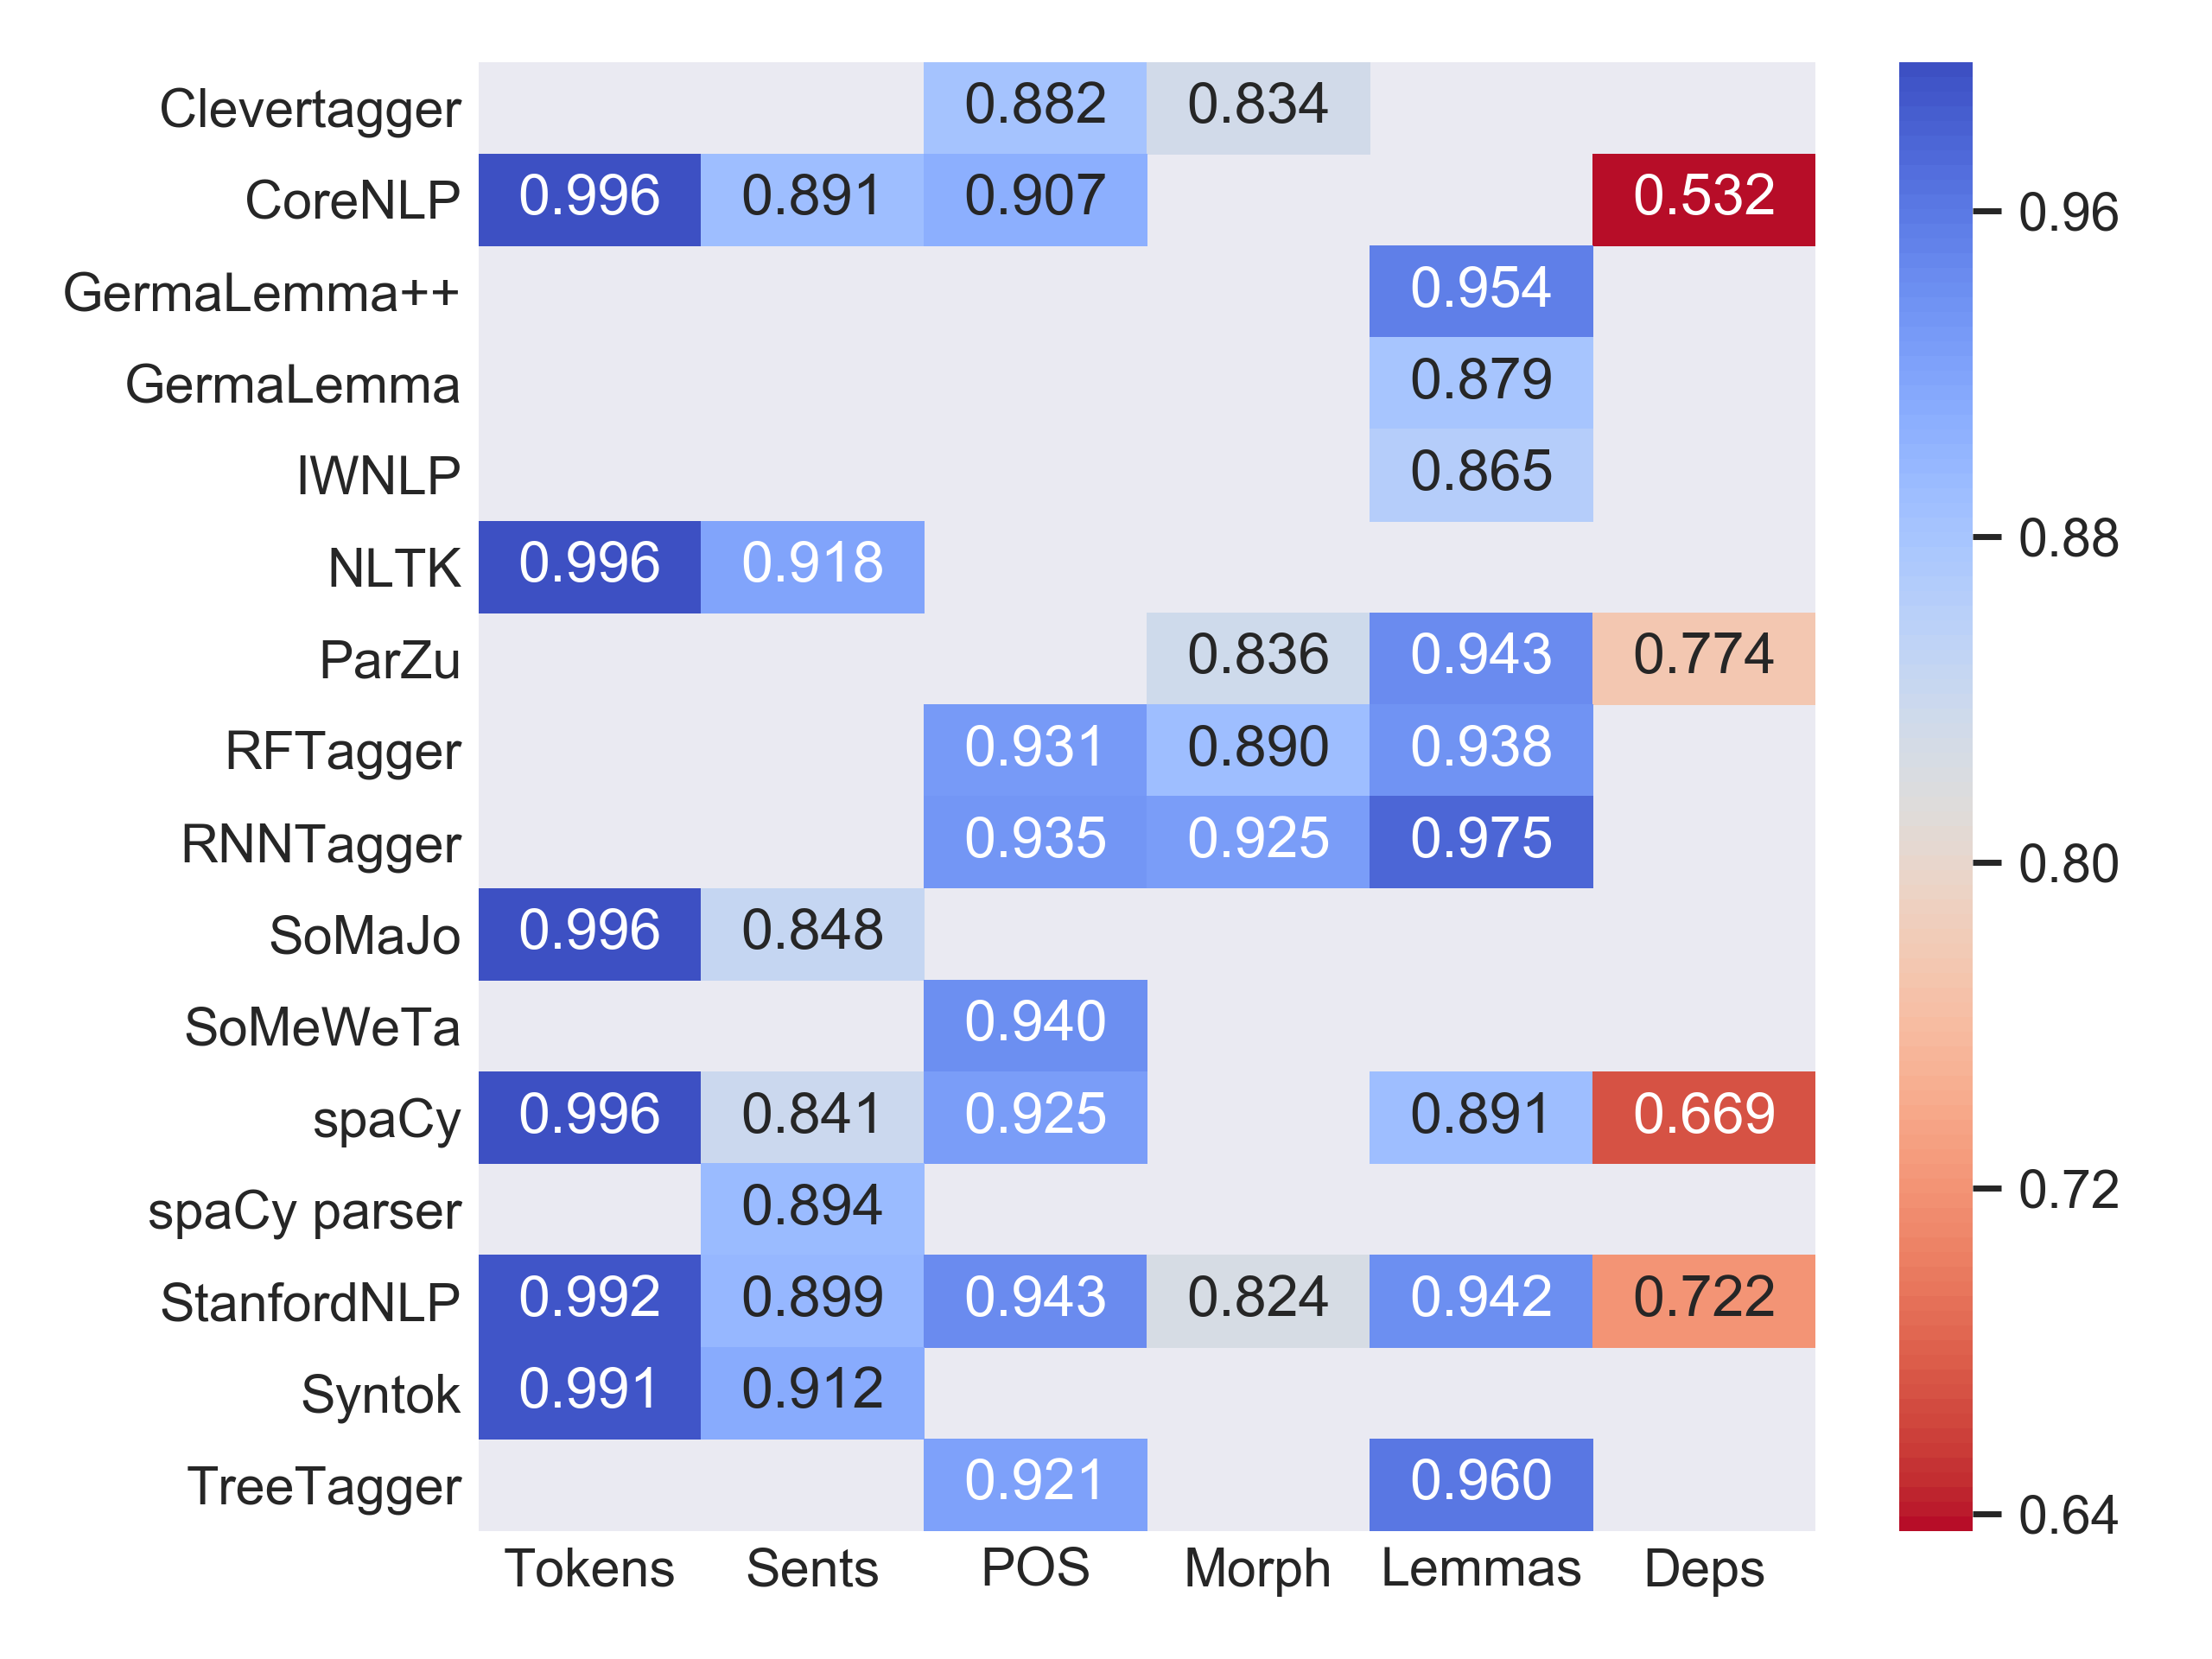

Quelle: Katrin Ortmann, Adam Roussel, and Stefanie Dipper. 2019. Evaluating Off-the-Shelf NLP Tools for German. In Proceedings of the 15th Conference on Natural Language Processing (KONVENS), 212--222.

#### Vergleich Geschwindigkeit

Quelle: Explosion.Ai, die Firma hinter spaCy

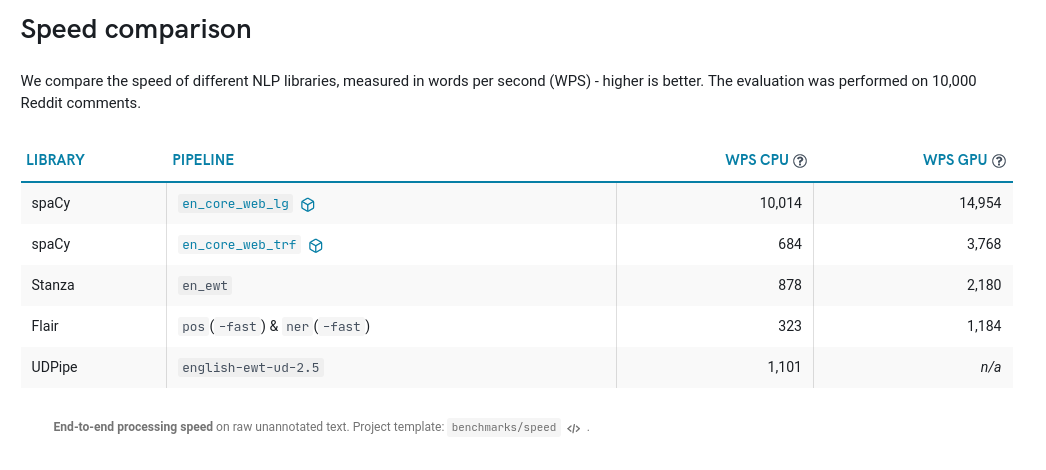